<a href="https://colab.research.google.com/github/AjithVH/Data-Analysis-Project/blob/main/Main_Project(social_media_vs_Productivity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Impact of Social Media Usage on Productivity and Wellbeing**






## **TASK 1: Problem Definition & Dataset Selection**

### **1.Introduction**

Social media has become an integral part of modern life, influencing how individuals communicate, relax, and work. While social media offers various benefits, excessive usage can negatively affect focus, productivity, and mental well-being. This project aims to analyze the relationship between social media usage patterns and productivity levels using exploratory data analysis techniques.

### **2.Aim of the Project**

The primary aim of this project is to analyze how daily social media usage impacts productivity and to identify additional factors such as stress, sleep, and work hours that influence productivity levels.

### **3. Objectives of the Project**

The objectives of this project are:

- To analyze daily social media usage patterns among individuals

- To study the relationship between social media usage and productivity

- To examine the impact of stress, sleep, and work hours on productivity

- To compare perceived productivity with actual productivity

- To derive meaningful insights using data visualization techni

### **4. Dataset Description**

The dataset used in this project contains information related to social media usage habits, productivity levels, work patterns, and lifestyle factors. It includes both numerical and categorical variables, making it suitable for exploratory data analysis.

**Key Features in the Dataset:**

- Age and gender of individuals

- Daily social media usage time

- Productivity scores (perceived and actual)

- Stress levels and sleep duration

- Work hours and digital wellbeing indicators

### **5.Load Dataset & Overview**

This step imports the dataset using Pandas and prints the following:

Shape of the dataset (rows, columns)

First few rows (head())

Data types (info())

Statistical summary for numeric columns (describe())
This allows us to understand the structure and quality of the dataset before cleaning.




In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.listdir('/content/drive/MyDrive/entri assignments/Final Project Entri')

['messy data social_media_vs_productivity .csv', 'cleaned_dataset.csv']

In [4]:
import pandas as pd

# Load dataset with the correct filename
df = pd.read_csv("/content/drive/MyDrive/entri assignments/Final Project Entri/messy data social_media_vs_productivity .csv")

print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(30000, 19)
   age  gender    job_type  daily_social_media_time  \
0   56    Male  Unemployed                 4.180940   
1   46    Male      Health                 3.249603   
2   32    Male     Finance                      NaN   
3   60  Female  Unemployed                      NaN   
4   25    Male          IT                      NaN   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                       61            6.753558   
1                    Twitter                       59            9.169296   
2                    Twitter                       57            7.910952   
3                   Facebook                       59            6.355027   
4                   Telegram                       66            6.214096   

   perceived_productivity_score  actual_productivity_score  stress_level  \
0                      8.040464                   7.291555           4.0   
1                      5.063368           

## **TASK 2: Data Cleaning & Pre-processing**

In this task, we prepare and clean the social media usage dataset for Exploratory Data Analysis (EDA).  

This includes:
- Handling missing values  
- Removing duplicates  
- Correcting data types  
- Standardizing column names  
- Creating derived features  
- Saving the cleaned dataset  


### **6. Basic Data Cleaning**

 perform three main cleaning operations:

1) Remove Duplicates
Duplicate rows can distort analysis, so we remove them using:
df.drop_duplicates()

2) Handle Missing Values
We use a simple and effective strategy:

Numeric columns → fill with median

Categorical columns → fill with mode (most frequent value)

This keeps the dataset consistent without deleting useful information.

3) Convert Numeric-Looking Columns
Some numeric values may be stored as text.
We attempt to convert all columns to numeric where possible using:
pd.to_numeric(errors="ignore")

In [5]:
clean = df.copy()

#### **6.1 Remove Duplicates**

In [6]:
# Remove duplicates
df = df.drop_duplicates()


#### **6.2 Handle missing values**

In [7]:
# Handle missing values
df = df.fillna(df.median(numeric_only=True))   # numeric → median
df = df.fillna(df.mode().iloc[0])              # categorical → mode

#### **6.3 Convert numeric-looking columns**

In [8]:
# Convert numeric-looking columns
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

/tmp/ipython-input-1631776094.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


#### **6.4 Create Derived Columns**

If the dataset contains both:

- daily_social_media_time

- work_hours_per_day

We create a new column:
 - total_time = daily_social_media_time + work_hours_per_day

- This helps in later analysis involving combined time usage.

In [9]:
# If these columns exist, create a total time column
if "daily_social_media_time" in df.columns and "work_hours_per_day" in df.columns:
    df["total_time"] = df["daily_social_media_time"] + df["work_hours_per_day"]



### **7.Missing Value Summary**

quickly check missing values using:
df.isnull().sum()

This helps verify whether missing-value handling worked correctly.

In [10]:
df.isnull().sum()


,0
age,0
gender,0
job_type,0
daily_social_media_time,0
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
perceived_productivity_score,0
actual_productivity_score,0
stress_level,0


In [11]:
df.to_csv("/content/drive/MyDrive/entri assignments/Final Project Entri/cleaned_dataset.csv", index=False)
print("Cleaned dataset saved permanently")


Cleaned dataset saved permanently


## **TASK 3 Exploratory Data Analysis(EDA)**

### **8.Exploratory Data Analysis(EDA)**
Exploratory Data Analysis is conducted to identify patterns, trends, and relationships within the dataset. The analysis is divided into three parts: Univariate, Bivariate, and Multivariate analysis.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

In [14]:
df_clean = df.copy()

df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_')


In [15]:
print(df_clean.columns.tolist())


['age', 'gender', 'job_type', 'daily_social_media_time', 'social_platform_preference', 'number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps', 'has_digital_wellbeing_enabled', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score', 'total_time']


In [16]:
# Social media usage category
df_clean['usage_category'] = pd.cut(
    df_clean['daily_social_media_time'],
    bins=[0, 2, 5, 10],
    labels=['Low', 'Medium', 'High']
)

# Productivity level (using ACTUAL productivity)
df_clean['productivity_level'] = pd.cut(
    df_clean['actual_productivity_score'],
    bins=[0, 4, 7, 10],
    labels=['Low', 'Moderate', 'High']
)


###  **8.1 Univariate Analysis**

Univariate analysis focuses on understanding the distribution and characteristics of individual variables.

The following aspects are analyzed:

- Distribution of daily social media usage

- Distribution of actual productivity scores

- Distribution of stress levels

- Distribution of sleep hours

These visualizations help understand the overall behavior and variability of individual features in the dataset.




#### **8.1.1 Distribution of Daily Social Media Usage**

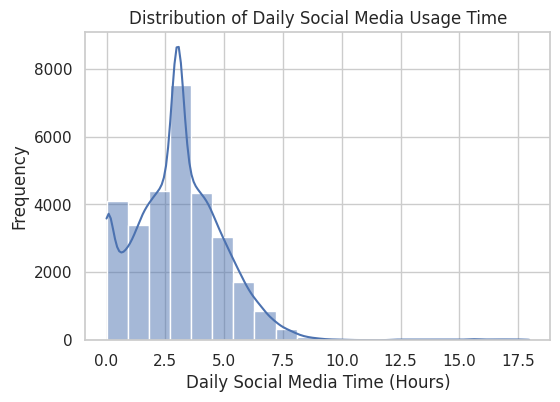

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean['daily_social_media_time'], bins=20, kde=True)
plt.title('Distribution of Daily Social Media Usage Time')
plt.xlabel('Daily Social Media Time (Hours)')
plt.ylabel('Frequency')
plt.show()


This visualization shows the distribution of daily social media usage time among individuals. Most users spend a moderate number of hours on social media each day, while a smaller portion of users exhibit very high usage. This provides an initial understanding of social media consumption patterns in the dataset.

#### **8.1.2 Distribution of Actual Productivity Score**

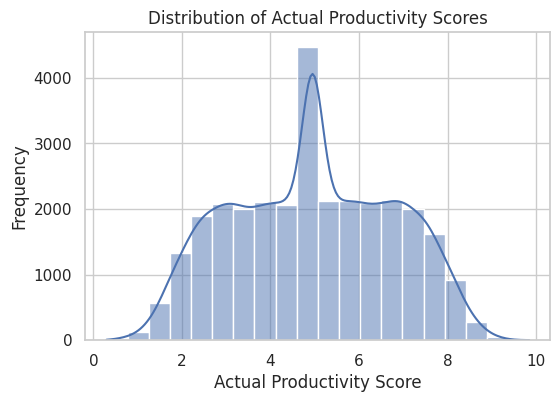

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean['actual_productivity_score'], bins=20, kde=True)
plt.title('Distribution of Actual Productivity Scores')
plt.xlabel('Actual Productivity Score')
plt.ylabel('Frequency')
plt.show()


This plot represents the distribution of actual productivity scores across individuals. The majority of participants fall within the mid-range productivity levels, indicating moderate overall productivity, with fewer individuals at extreme low or high productivity levels.

#### **8.1.3 Stress Level Distribution**

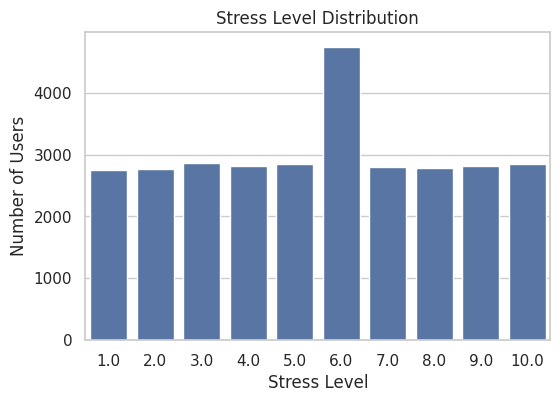

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='stress_level', data=df_clean)
plt.xlabel('Stress Level')
plt.ylabel('Number of Users')
plt.title('Stress Level Distribution')
plt.show()



This count plot illustrates the frequency of different stress levels reported by individuals. It helps identify how common each stress category is and provides insight into the overall stress distribution within the dataset.

#### **8.1.4 Sleep Hours Distribution**

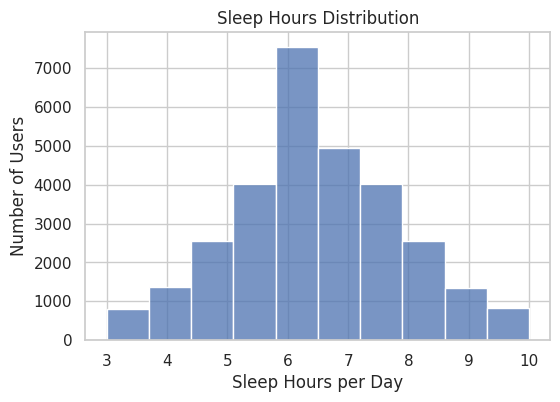

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean['sleep_hours'], bins=10)
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Number of Users')
plt.title('Sleep Hours Distribution')
plt.show()


This visualization displays the distribution of daily sleep hours among individuals. It highlights typical sleep patterns and helps identify whether insufficient or excessive sleep is common in the dataset.

### **8.2 BIVARIATE ANALYSIS**

Bivariate analysis examines the relationship between two variables at a time.

The following relationships are explored:

Daily social media usage vs actual productivity

Social media usage category vs productivity

Work hours per day vs productivity

Sleep hours vs productivity

This analysis helps understand how productivity is influenced by social media usage and lifestyle factors.

#### **8.2.1 Daily Social Media Time vs Actual Productivity**

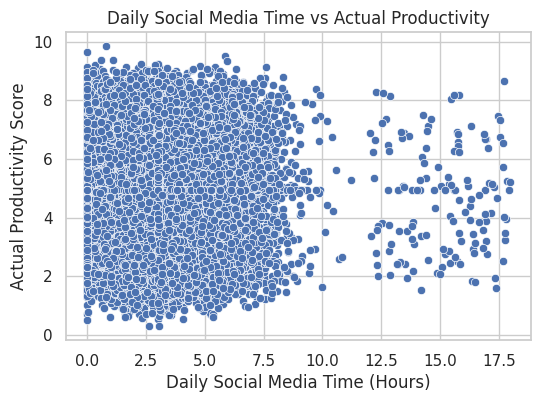

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='daily_social_media_time',
    y='actual_productivity_score',
    data=df_clean
)
plt.xlabel('Daily Social Media Time (Hours)')
plt.ylabel('Actual Productivity Score')
plt.title('Daily Social Media Time vs Actual Productivity')
plt.show()


This scatter plot examines the relationship between daily social media usage time and actual productivity scores. A general downward trend can be observed, suggesting that higher social media usage is often associated with lower productivity levels.

#### **8.2.2 Usage Category vs Actual Productivity (Boxplot)**

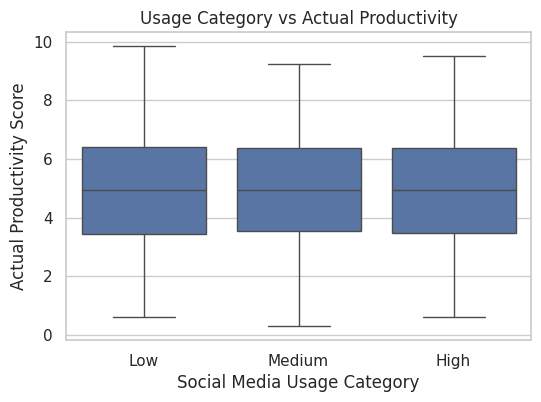

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='usage_category',
    y='actual_productivity_score',
    data=df_clean
)
plt.xlabel('Social Media Usage Category')
plt.ylabel('Actual Productivity Score')
plt.title('Usage Category vs Actual Productivity')
plt.show()


This boxplot compares productivity scores across different social media usage categories. Individuals with low social media usage tend to have higher median productivity, while those in the high usage category generally show lower productivity scores.

#### **8.2.3 Work Hours per Day vs Actual Productivity**

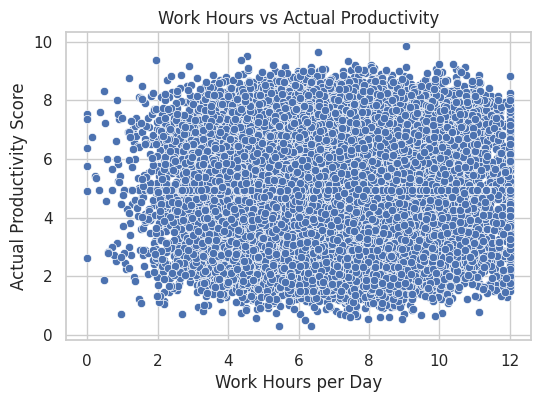

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='work_hours_per_day',
    y='actual_productivity_score',
    data=df_clean
)
plt.xlabel('Work Hours per Day')
plt.ylabel('Actual Productivity Score')
plt.title('Work Hours vs Actual Productivity')
plt.show()


This scatter plot analyzes the relationship between daily work hours and actual productivity. The visualization suggests that extremely long work hours do not necessarily lead to higher productivity, highlighting the importance of balanced work schedules.

#### **8.2.4 Sleep Hours vs Actual Productivity**

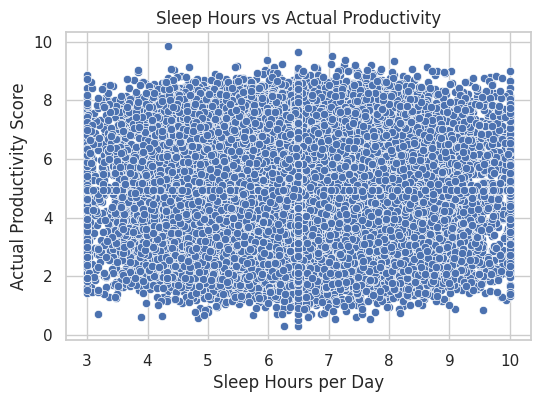

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='sleep_hours',
    y='actual_productivity_score',
    data=df_clean
)
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Actual Productivity Score')
plt.title('Sleep Hours vs Actual Productivity')
plt.show()


This scatter plot examines the relationship between daily sleep hours and actual productivity scores. The visualization indicates that individuals who get adequate sleep generally tend to have higher productivity levels, while insufficient sleep is often associated with lower productivity. This highlights the importance of healthy sleep patterns in maintaining consistent work performance.

### **8.3 MULTIVARIATE ANALYSIS**

Multivariate analysis explores the combined effect of multiple variables on productivity.

The following analyses are performed:

Productivity across usage categories grouped by stress levels

Correlation analysis among key numerical variables

This step provides deeper insights into how multiple factors interact to affect productivity.

#### **8.3.1 Usage Category vs Productivity (Grouped by Stress Level)**

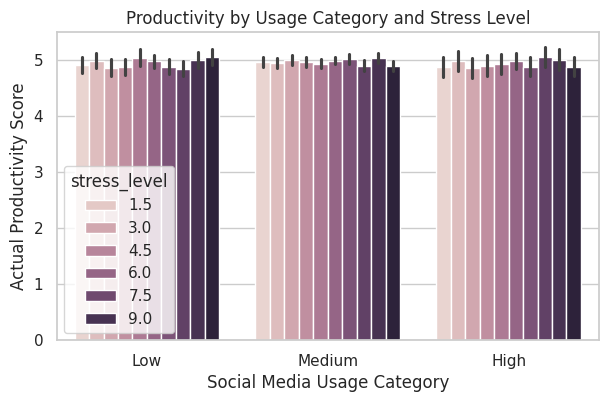

In [25]:
plt.figure(figsize=(7,4))
sns.barplot(
    x='usage_category',
    y='actual_productivity_score',
    hue='stress_level',
    data=df_clean
)
plt.xlabel('Social Media Usage Category')
plt.ylabel('Actual Productivity Score')
plt.title('Productivity by Usage Category and Stress Level')
plt.show()


This multivariate bar chart illustrates how productivity varies across social media usage categories when combined with different stress levels. The results show that high stress levels, when coupled with heavy social media usage, significantly reduce productivity.

#### **8.3.2 Correlation Heatmap (Multiple Numerical Variables)**

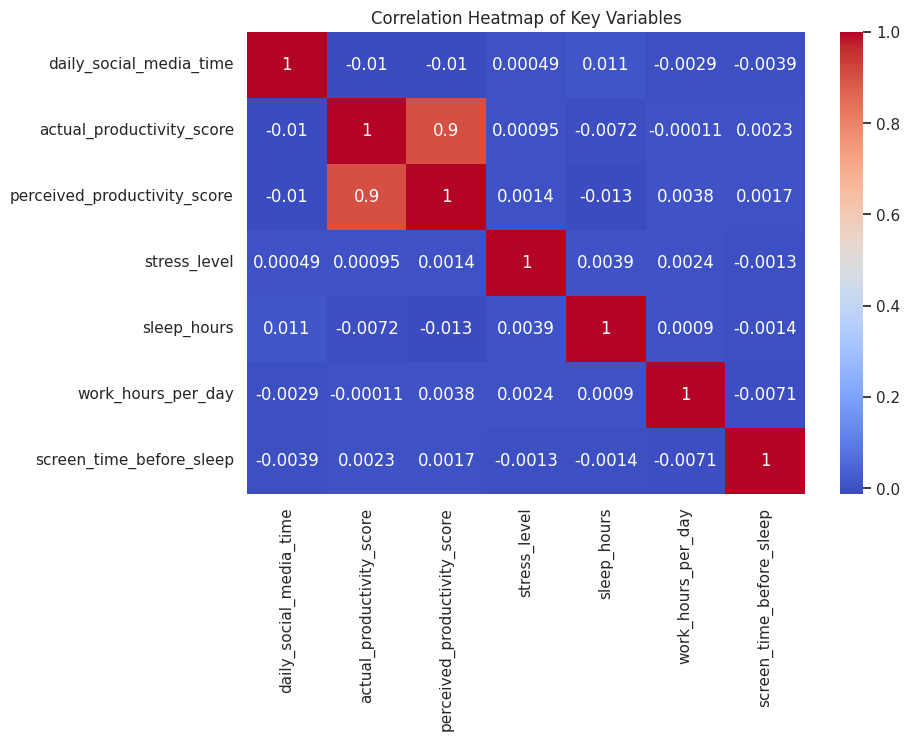

In [26]:
plt.figure(figsize=(9,6))
sns.heatmap(
    df_clean[
        [
            'daily_social_media_time',
            'actual_productivity_score',
            'perceived_productivity_score',
            'stress_level',
            'sleep_hours',
            'work_hours_per_day',
            'screen_time_before_sleep'
        ]
    ].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap of Key Variables')
plt.show()


This heatmap presents the correlation between key numerical variables such as social media usage time, productivity scores, stress level, sleep hours, and work hours. It reveals negative correlations between social media usage and productivity, while sleep hours show a positive association with productivity.

## **TASK 4: Documentation, Insights & Presentation**

### **9. INSIGHTS**

 ### 1)  **Social media usage negatively impacts productivity**

Individuals who spend more time on social media each day tend to show lower actual productivity scores. This suggests that excessive social media usage may act as a distraction during work hours.

### 2) **Low social media users are more productive**

Users categorized under low social media usage consistently demonstrate higher median and average productivity scores compared to medium and high usage groups.

### 3) **Stress amplifies productivity loss**

High stress levels combined with heavy social media usage result in significantly reduced productivity, indicating that stress and digital habits together affect work efficiency.

### 4) **Sleep plays a crucial role in productivity**

Individuals with adequate sleep hours generally show higher productivity scores, highlighting the importance of healthy sleep patterns for maintaining work performance.

### 5) **Perceived productivity often differs from actual productivity**

The comparison between perceived and actual productivity reveals that many individuals overestimate their productivity, especially those with higher social media usage.

### **10.CONCLUSION**


This project analyzed the impact of social media usage on productivity using exploratory data analysis techniques. The findings indicate a clear negative relationship between excessive social media usage and actual productivity levels. Additional factors such as stress, sleep duration, and work hours further influence productivity outcomes. The analysis highlights the importance of maintaining balanced digital habits, managing stress effectively, and ensuring adequate rest to improve overall productivity.